# Galápagos Island Finches

Every year for the past 40-plus years, Peter and Rosemary Grant have gone to the Galápagos island of Daphne Major and collected data on Darwin's finches. Using statistical inference, we will analyze their data and witness evolution in action! 

Credit for guidance for this case study to Justin Bois and his statisitcal analysis datacamp course. 

## Darwin's finches: A statistical analysis

Taking a dataset on finch beak dimensions, we'll be performing an analysis demonstrating various statisitical concepts. Some of the tools we'll be employing include: 

- Graphical and quantitative exploratory data analysis (EDA) 
- Parameter estimation
- Confidence interval calculation
- Hypothesis testing

But first, a little background:

### Charles Darwin

<img src = "Images/Finches-1-Darwin.png" width = 500>

Image: Public domain, US

Many of the important observations that led Charles Darwin to develop his insights and the theory of evolution came from his Journey to the Galápagos archipelgo. 

<img src = "Images/Finches-2-Galapagos.png" width = 500>
Image: NASA

Particularly, his study of finches (small birds) inhabited these islands and how they changed and adjusted to their environment. 

The islands were a perfect test lab for studying evolution due to their isolated nature and lower numbers of interactions with other species. Additionally, because the numbers are small, an entire population of a given island can be monitored. 

### The island of Daphne Major and Daphne Minor

<img src = "Images/Finches-3-Daphnes.png" width = 500>

Image: Grant and Grant, 2014

Every year since 1973, Peter and Rosemary Grant spent months on one of the Galápagos islands known as Daphne Major. 

### The finches of Daphne Major

- There are two major species of finches on the Daphne Major, pictured here: 

#### Geospiza fortis

<img src = "Images/Finches-4-Daphne Major.png" width = 500>

#### Geospiza scandens

<img src = "Images/Finches-5-Daphne Major.png" width = 500>

Source: John Gould, public domain

### The data

- They wrote a book! 
    - Peter and Rosemary Grant *40 Years of Evolution: Darwin's Finches on Daphne Major Island* Princeton University Press, 2014 

- They also posted their data and we acquired it at Dryad: 
    - Data acquired from [Dryad Digital Repository](http://dx.doi.org/10.5061/dryad.g6g3h)

### The dimensions of the finch beak

- Although the dataset is very rich, we will focus our efforts on two measurements: length and depth. 


<img src = "Images/Finches-6-BeakLength.png" width = 500>
<img src = "Images/Finches-7-BeakDepth.png" width = 500>

Source: John Gould, public domain

### Questions we want to Answer

- How do the beaks change over time?
- How do the species differ?
- How are characteristic transferred from generation to generation? 

### Basic beginnings

We'll start with some EDA of how beak depth has changed over time. We'll be looking specifically at beak depths in 1975 compared to 2012. 
Then we'll estimate parameters of mean beak depth with confidence intervals. Finally, we'll perform a hypothesis test to see if the mean beak depth has changed between those years. 



## EDA of beak depths and lengths of Darwin's finches

Let's study how the dimensions of the finch species *Geospiza scandens* has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, *Geospiza fortis*. These effects can lead to changes in the species over time. Let's look first at the beak depth of *G. scandens* on Daphne Major in 1975 and in 2012 by first plotting all the measurements of those two years. We'll use a bee swarm plot since it's a small amount of data and is more intutive than a box plot. Bee swarm plots also help to eliminate bias by showing all the data instead of a histogram's bins. We'll then replicate the workflow for the beak lengths. 

We'll also begin with some basic statistics on the datasets before we clean them. 

In [1]:
#The data are stored in a pandas DataFrame called `df` with columns `'year'` and `'beak_depth'`. The units of beak depth are millimeters (mm).

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import
finches1975 = pd.read_csv('data/finch_beaks_1975.csv')
finches2012 = pd.read_csv('data/finch_beaks_2012.csv')
print('General information:')
print('1975:')
finches1975.info()
print('2012:')
finches2012.info()
print('\nSummary Statistics:')
print('1975:')
finches1975.describe()
print('2012:')
finches2012.describe()
print('\nFirst and last 5 rows:')
print('1975 :')
finches1975.head()
finches1975.tail()
print('2012:')
finches2012.head()
finches2012.tail()

General information:
1975:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 4 columns):
band               403 non-null int64
species            403 non-null object
Beak length, mm    403 non-null float64
Beak depth, mm     403 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.7+ KB
2012:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
band       248 non-null int64
species    248 non-null object
blength    248 non-null float64
bdepth     248 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.8+ KB

Summary Statistics:
1975:
2012:

First and last 5 rows:
1975 :
2012:


,band,species,blength,bdepth
243,21295,scandens,14.2,9.3
244,21297,scandens,13.0,9.8
245,21340,scandens,14.6,8.9
246,21342,scandens,13.1,9.8
247,21347,scandens,15.2,9.1


Let's combine these into an easier dataset, standardizing the column names and adding the years. 

In [2]:
finches1975['year'] = 1975
finches2012['year'] = 2012
finches1975.columns = ['band', 'species', 'beak_length', 'beak_depth', 'year']
finches2012.columns = ['band', 'species', 'beak_length', 'beak_depth', 'year']
finches = finches1975.append(finches2012)
finches.head()
finches.describe()



,band,beak_length,beak_depth,year
count,651.000000,651.000000,651.000000,651.000000
mean,8824.215054,11.588618,9.040952,1989.095238
std,9586.864492,1.659108,0.735171,17.981790
min,2.000000,8.700000,7.200000,1975.000000
25%,571.500000,10.300000,8.500000,1975.000000
50%,923.000000,11.000000,9.000000,1975.000000
75%,19659.000000,13.100000,9.600000,2012.000000
max,22000.000000,15.940000,11.100000,2012.000000


Now we'll take a subset of just the *scandens* species to perform our analysis on. 

In [3]:
#Verify there are only two species in the dataset:
finches.species.unique()

scandens_depth = finches.loc[finches.species == 'scandens'][['beak_depth', 'year']].reset_index(drop = True)
scandens_depth.describe()

,beak_depth,year
count,214.000000,214.000000
mean,9.094252,1996.957944
std,0.637941,18.216566
min,7.700000,1975.000000
25%,8.662500,1975.000000
50%,9.075000,2012.000000
75%,9.500000,2012.000000
max,11.000000,2012.000000


### Swarm plot:

Now that we've cleaned the data, let's make a bee swarm plot: 



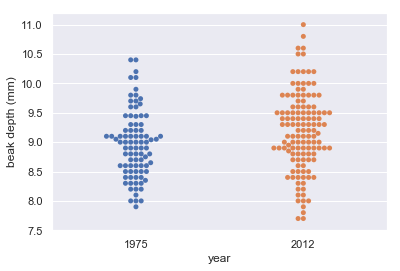

In [4]:
#default plotting to seaborn style
sns.set()

# Create bee swarm plot
_ = sns.swarmplot(x='year', y='beak_depth', data=scandens_depth)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

It can be hard to tell if over the forty years, much has changed. Just looking though, it seems like beak depth widened in variability and the mean and median have increased. Let's replicate this for beak length and the same parameters for the second species. We'll first melt the dataframe to make it easier to create a Facetplot in Seaborn. 

In [5]:
#create and look at the new dataframe
finch_melt = pd.melt(finches, id_vars=['species', 'year'], value_vars=['beak_length', 'beak_depth'])
finch_melt.head()

,species,year,variable,value
0,fortis,1975,beak_length,9.4
1,fortis,1975,beak_length,9.2
2,fortis,1975,beak_length,9.5
3,fortis,1975,beak_length,9.5
4,fortis,1975,beak_length,11.5


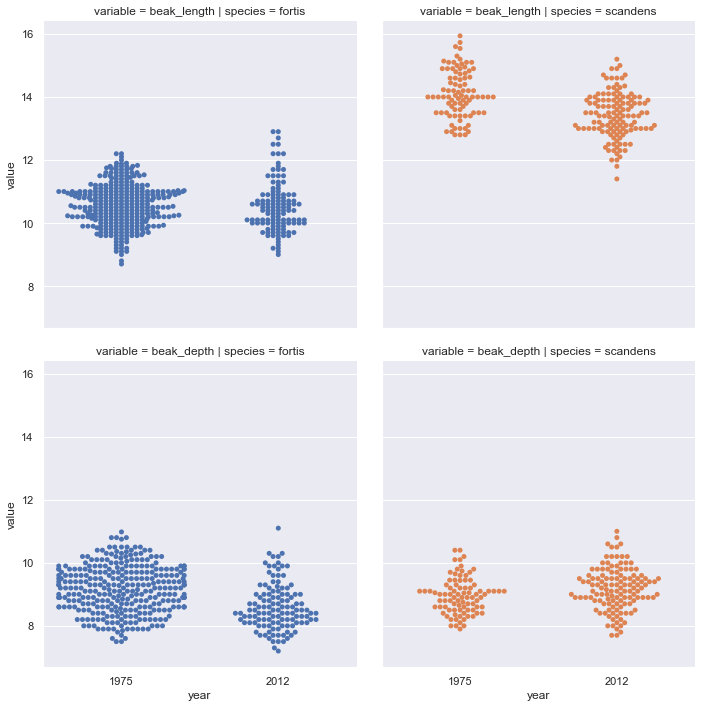

In [6]:
#create a facetgrid
g = sns.FacetGrid(finch_melt, 
                  col="species",  
                  row="variable", 
                  height=5, 
                  aspect=1, 
                  hue = "species")

#map the swarmplots into the facetgrid
g = g.map(sns.swarmplot, "year", "value", order = [1975, 2012])

#Show the plot
plt.show()

The bottom right swarm plot is the same one we originally built. What does this initial data tell us? Looks like for beak_depth on scandens, widened in variation with a light increase in depth. For length, though, the median value looks like it decreased. For the fortis species, it looks like both the median depth and length decreased and there were a lot less measurements of the species in 2012. Let's look in more detail. 

## ECDFs of beak depths
When the data gets too large and the swarm plot starts to get obfuscated, it's a good time to transition to the Empirical Cumulative Distribution Function (ECDF). This shows the curve of how as the percentage of the dataset that is below set values shifts. 

While our previous bee swarm plots are useful, ECDFs are often even better when doing EDA. We'll plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot. 

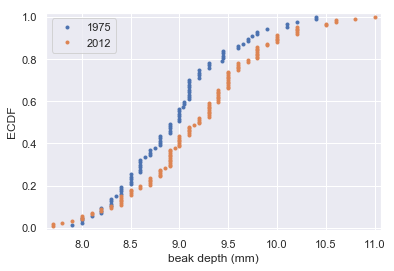

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

beak_depth_1975 = finches.loc[(finches.species == 'scandens')&(finches.year == 1975)].beak_depth.values
beak_depth_2012 = finches.loc[(finches.species == 'scandens')&(finches.year == 2012)].beak_depth.values

# Compute ECDFs
x_1975, y_1975 = ecdf(beak_depth_1975)
x_2012, y_2012 = ecdf(beak_depth_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
_ = plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

## Parameter estimates of beak depths

Let's estimate the *difference* of the mean beak depth of the *G. scandens* samples from 1975 and 2012 and report a 95% confidence interval using boostrap sampling. 


In [8]:
np.random.seed(1975) 

def draw_bootstrap_replicates(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates
    bootstrap_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bootstrap_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bootstrap_replicates

# Compute the difference of the sample means: mean_diff
mean_difference = beak_depth_2012.mean() - beak_depth_1975.mean()

# Get bootstrap replicates of means
bootstrap_replicates_1975 = draw_bootstrap_replicates(beak_depth_1975, np.mean, 10000)
bootstrap_replicates_2012 = draw_bootstrap_replicates(beak_depth_2012, np.mean, 10000)

# Compute samples of difference of means
bootstrap_difference = bootstrap_replicates_2012- bootstrap_replicates_1975

# Compute 95% confidence interval: conf_int
confidence_interval = np.percentile(bootstrap_difference, [2.5, 97.5])

# Print the results
print('difference of means =', mean_difference, 'mm')
print('95% confidence interval =', confidence_interval, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.0612846  0.38989377] mm


## Hypothesis test: Are beaks deeper in 2012?

Our plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of *G. scandens* on Daphne Major have gotten deeper. But we want to make sure this effect isn't just due to random chance. In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

We need to be clear on what we're testing. First, it is *not* that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.


In [9]:
np.random.seed(1975)
# Compute mean of combined data set: combined_mean
overall_mean = np.mean(np.concatenate((beak_depth_1975, beak_depth_2012)))

# Shift the samples
beak_depth_1975_shifted = beak_depth_1975-beak_depth_1975.mean() + overall_mean
beak_depth_2012_shifted = beak_depth_2012-beak_depth_2012.mean() + overall_mean

# Get bootstrap replicates of shifted data sets
bootstrap_replicates_1975 = draw_bootstrap_replicates(beak_depth_1975_shifted, np.mean, 10000)
bootstrap_replicates_2012 = draw_bootstrap_replicates(beak_depth_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means
bootstrap_differences = bootstrap_replicates_2012-bootstrap_replicates_1975

# Compute the p-value
p = np.sum(bootstrap_differences >= mean_difference) / len(bootstrap_differences)

# Print p-b
print('p =', p)


p = 0.0032


We get a p-value of 0.0032, which, because it's so small, suggests that there is a statistically significant difference. But we need to remember this is different from our percentile calculation previously. In the previous section, we got a difference of 0.2 mm between the means. We should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years!

## Variation of beak shapes

What might have caused this statistically significant change in beak depth? 
One of the hypotheses put forward was a drought on Daphne Major that occurred from 1976 to 1977. 

<img src = "Images/Finches-8-Drought.png" width = 500>

Source: Grant and Grant, 2014

The graph shows that fewer small seeds were available for consumption in 1977 so those birds with deeper beaks had a better chance of cracking the larger seeds and reproducing. Evolution in action! 

Now is it just the size of the beak that matters or is the shape? 
Let's compare not only how the depth changed, but also the length. If they both changed at the same rate, the shape should stay the same, but if not, we can see a differently shaped beak is conferring additional advantage to the finches. 

<img src = "Images/Finches-6-BeakLength.png" width = 500>
<img src = "Images/Finches-7-BeakDepth.png" width = 500>

Source: John Gould, public domain



## EDA of beak length and depth

Let's compare beak length and depth using just scatter plots of beak depth versus beak length for the 1975 and 2012 specimens.


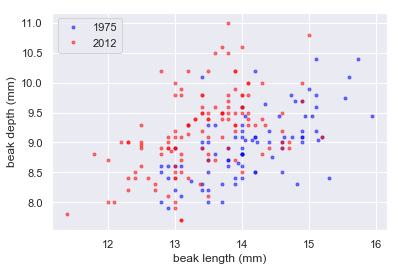

In [10]:
beak_length_1975 = finches.loc[(finches.species == 'scandens')&(finches.year == 1975)].beak_length.values
beak_length_2012 = finches.loc[(finches.species == 'scandens')&(finches.year == 2012)].beak_length.values

# Make scatter plot of 1975 data
_ = plt.plot(beak_length_1975, beak_depth_1975, marker='.',
             linestyle='None', color = 'blue', alpha = 0.5)

# Make scatter plot of 2012 data
_ = plt.plot(beak_length_2012, beak_depth_2012, marker='.',
             linestyle='None', color = 'red', alpha = 0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

We see that beaks got deeper (the red points are higher up in the y-direction), but not longer. In fact, they reduced in length, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

## Linear regressions

Let's do a linear regression for 1975 and the 2012 data. Then we'll perform pairs bootstrap estimates for the regression parameters. Finally, we'll report 95% confidence intervals on the slope and intercept of the regression line.


In [11]:
def draw_bootstrap_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates
    bootstrap_slope_replicates = np.empty(size)
    bootstrap_intercept_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bootstrap_inds = np.random.choice(inds, size=len(inds))
        bootstrap_x, bootstrap_y = x[bootstrap_inds], y[bootstrap_inds]
        bootstrap_slope_replicates[i], bootstrap_intercept_replicates[i] = np.polyfit(bootstrap_x, bootstrap_y, 1)

    return bootstrap_slope_replicates, bootstrap_intercept_replicates

# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(beak_length_1975, beak_depth_1975, 1)
slope_2012, intercept_2012 = np.polyfit(beak_length_2012, beak_depth_2012, 1)

# Perform pairs bootstrap for the linear regressions
bootstrap_slope_reps_1975, bootstrap_intercept_reps_1975 = \
        draw_bootstrap_pairs_linreg(beak_length_1975, beak_depth_1975, 10000)
bootstrap_slope_reps_2012, bootstrap_intercept_reps_2012 = \
        draw_bootstrap_pairs_linreg(beak_length_2012, beak_depth_2012, 10000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bootstrap_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bootstrap_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bootstrap_intercept_reps_1975, [2.5, 97.5])

intercept_conf_int_2012 = np.percentile(bootstrap_intercept_reps_2012, [2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.33485256 0.59377836]
1975: intercept = 2.3908752365842263 conf int = [0.57629844 4.22779324]
2012: slope = 0.462630358835313 conf int = [0.33586703 0.6017774 ]
2012: intercept = 2.9772474982360198 conf int = [1.14837108 4.6897747 ]


It looks like they have the same slope, but different intercepts!

## Displaying the linear regression results

Using the data we just calculated, we'll now display the same on a scatter plot. 


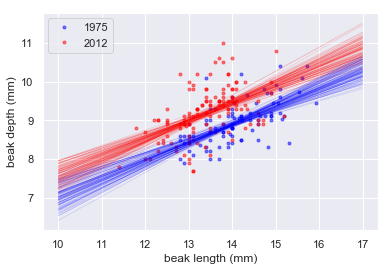

In [12]:
# Make scatter plot of 1975 data
_ = plt.plot(beak_length_1975, beak_depth_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(beak_length_2012, beak_depth_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17]) # range of the boot strap values, correlates with beak depth

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, x*bootstrap_slope_reps_1975[i]+bootstrap_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    _ = plt.plot(x, x*bootstrap_slope_reps_2012[i]+bootstrap_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

## Or just use seaborn: 

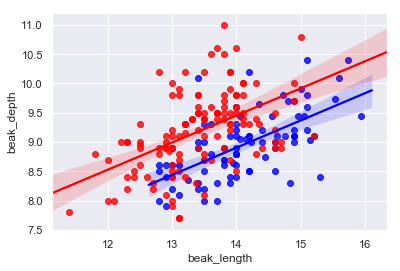

In [23]:
#create the filtered datasets
scandens_1975 = finches.loc[(finches.species == 'scandens' ) & (finches.year == 1975)]
scandens_2012 = finches.loc[(finches.species == 'scandens' ) & (finches.year == 2012)]

#make the same regression plot
_ = sns.regplot(x = 'beak_length', y = 'beak_depth', data = scandens_1975 , ci = 95, color = 'blue')
_ = sns.regplot(x = 'beak_length', y = 'beak_depth', data = scandens_2012 , ci = 95, color = 'red')

#show the plot
plt.show()


## Beak length to depth ratio

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

In [14]:
np.random.seed(42)
# Compute length-to-depth ratios
ratio_1975 = beak_length_1975/beak_depth_1975
ratio_2012 = beak_length_2012/beak_depth_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bootstrap_replicates_1975 = draw_bootstrap_replicates(ratio_1975, np.mean, 10000)
bootstrap_replicates_2012 = draw_bootstrap_replicates(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
confidence_interval_1975 = np.percentile(bootstrap_replicates_1975, [0.5, 99.5])
confidence_interval_2012 = np.percentile(bootstrap_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      '99% conf int =', confidence_interval_1975)
print('2012: mean ratio =', mean_ratio_2012,
      '99% conf int =', confidence_interval_2012)
mean_ratio_2012/mean_ratio_1975

1975: mean ratio = 1.5788823771858533 99% conf int = [1.55668803 1.60073509]
2012: mean ratio = 1.4658342276847767 99% conf int = [1.44363932 1.48729149]


0.9283998915089736

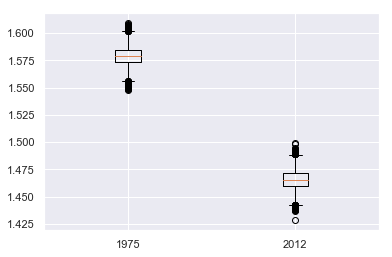

In [15]:
_ = plt.boxplot([bootstrap_replicates_1975, bootstrap_replicates_2012], labels = ['1975', '2012'])
plt.show()

The mean beak length-to-depth ratio decreased by about 0.11 , or 7.2%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so the beak shape did indeed change. 

## Calculation of heritability

What's causing the beak shape to change for the scandens species? The prevailing theory is the interbreeding with the other major finch species, the *G. fortis*. They then reproduce with pure scandens, introregressive hybridization, which can bring fortis characteristics into the scandens species. Similar to the human intermixing with neanderthals. 

To see the validity of this explanation, let's dive into calculating how strongly parental traits are passed on to offspring. 

In the next sections, we'll look at how parental beak depth is inherited by offspring in both fortis and scandens. 


## EDA of heritability

The array `beak_depth_parent_scandens` contains the average beak depth (in mm) of two parents of the species `G. scandens`. The array `beak_depth_offspring_scandens` contains the average beak depth of the offspring of the respective parents. The arrays `beak_depth_parent_fortis` and `beak_depth_offspring_fortis` contain the same information about measurements from *G. fortis* birds.

We'll make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species. 


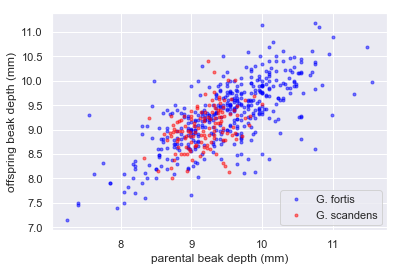

In [16]:
#import data
beak_depth_scandens = pd.read_csv('data/scandens_beak_depth_heredity.csv')
beak_depth_fortis = pd.read_csv('data/fortis_beak_depth_heredity.csv')
#clean data
beak_depth_offspring_fortis = beak_depth_fortis['Mid-offspr'].values
beak_depth_parent_fortis = np.mean((beak_depth_fortis['Male BD'], beak_depth_fortis['Female BD']), axis = 0)
beak_depth_offspring_scandens = beak_depth_scandens['mid_offspring']
beak_depth_parent_scandens = beak_depth_scandens['mid_parent']

# Make scatter plots
_ = plt.plot(beak_depth_parent_fortis, beak_depth_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(beak_depth_parent_scandens, beak_depth_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()



It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

## Correlation of offspring and parental data

In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap. 

We have a function to calculate pairs bootstrap to get estimates for parameters derived from linear regression. Here, we'll make a new function with call signature `draw_bootstrap_pairs(x, y, func, size=1)` that performs pairs bootstrap and computes a single statistic on the pairs samples. The statistic of interest is computed by calling `func(bs_x, bs_y)`. We'll use this function combined with the Pearson correlation statistic to measure the correlation of parental beak depth with the offspring's.


In [17]:
def draw_bootstrap_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    indices = np.arange(0, len(x))

    # Initialize replicates: bs_replicates
    bootstrap_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bootstrap_indices = np.random.choice(indices, size=len(indices))
        bootstrap_x, bootstrap_y = x[bootstrap_indices], y[bootstrap_indices]
        bootstrap_replicates[i] = func(bootstrap_x, bootstrap_y)

    return bootstrap_replicates



## Pearson correlation of offspring and parental data


As a quick reminder, the Pearson correlation statistic measure the covariance of two variables vs how much they vary independently. It's defined as: 

$\rho = \text{Pearson correlation} = \frac{\text{variability from codependence}}{\text{independent variability}} = \frac{\text{covariance}}{(\text{std of x})(\text{std of y})}$

The Pearson correlation coefficient will be a useful measure of how strongly the beak depth of parents are inherited by their offspring. We'll compute the Pearson correlation coefficient between parental and offspring beak depths for *G. scandens* as well as *G. fortis*. Then, we'll use the function we just wrote to compute a 95% confidence interval using pairs bootstrap. 


In [18]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute the Pearson correlation coefficients
r_scandens = pearson_r(beak_depth_parent_scandens, beak_depth_offspring_scandens)
r_fortis = pearson_r(beak_depth_parent_fortis, beak_depth_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bootstrap_replicates_scandens = draw_bootstrap_pairs(beak_depth_parent_scandens, beak_depth_offspring_scandens, pearson_r, 1000)

bootstrap_replicates_fortis = draw_bootstrap_pairs(beak_depth_parent_fortis, beak_depth_offspring_fortis, pearson_r, 1000)


# Compute 95% confidence intervals
confidence_interval_scandens = np.percentile(bootstrap_replicates_scandens, [2.5, 97.5])
confidence_interval_fortis = np.percentile(bootstrap_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, confidence_interval_scandens)
print('G. fortis:', r_fortis, confidence_interval_fortis)


G. scandens: 0.4117063629401258 [0.27941479 0.54611115]
G. fortis: 0.7283412395518487 [0.66942524 0.77833495]


## Using Scipy

We can also use the Scipy package's pearson function and get our two-tailed p-value, a probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. 



In [19]:
from scipy.stats import pearsonr

print("Scandens Pearson correlation and p-value: ", pearsonr(beak_depth_parent_scandens, beak_depth_offspring_scandens))
print("Fortis Pearson correlation and p-value: ", pearsonr(beak_depth_parent_fortis, beak_depth_offspring_fortis))

Scandens Pearson correlation and p-value:  (0.41170636294012586, 1.1362967123975657e-06)
Fortis Pearson correlation and p-value:  (0.7283412395518485, 1.8039661676453897e-69)


It is clear from the confidence intervals and p-values that beak depth of the offspring of *G. fortis* parents is more strongly correlated with their offspring than their *G. scandens* counterparts.

## Measuring heritability

Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but, now that I think about it, it might not be the best estimate of heritability. It might make more sense to define heritability as the ratio of the covariance between parent and offspring to the *variance of the parents alone*. In this exercise, we will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.


In [20]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    #The covariance of the trait in parents and offspring can be accessed with the index [0,1] 
    #The variance of the trait in the parents can be accessed with the index [0,0].
    return covariance_matrix[0,1] / covariance_matrix[0,0] 

# Compute the heritability
heritability_scandens = heritability(beak_depth_parent_scandens, beak_depth_offspring_scandens)
heritability_fortis = heritability(beak_depth_parent_fortis, beak_depth_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bootstrap_pairs(
        beak_depth_parent_scandens, beak_depth_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bootstrap_pairs(
        beak_depth_parent_fortis, beak_depth_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)


G. scandens: 0.5485340868685982 [0.36304362 0.75823361]
G. fortis: 0.7229051911438156 [0.64944066 0.79935277]


Here again, we see that G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.

This exercise highlights an important point; statistical inference (and data analysis in general) is not a plug-n-chug enterprise. We need to think carefully about the questions we are seeking to answer with our data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more appropriate than the off-the-shelf statistic, the Pearson correlation coefficient.

## Is beak depth heritable at all in G. scandens?

The heritability of beak depth in *G. scandens* seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. Let's test that idea here. To do this, we will accomplish a pairs permutation test.


In [21]:
np.random.seed(1975)

# Initialize array of replicates: perm_replicates
permutations_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    beak_depth_parent_permuted = np.random.permutation(beak_depth_parent_scandens)
    permutations_replicates[i] = heritability(beak_depth_parent_permuted, beak_depth_offspring_scandens)


# Compute p-value: p
p = np.sum(permutations_replicates >= heritability_scandens) / len(permutations_replicates)

# Print the p-value
print('p-val =', p)


p-val = 0.0


We got a p-value of zero, which means that none of the 10,000 permutation pairs replicates we drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in *G. scandens*, just not as much as in *G. fortis*. Let's plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability we might expect by chance.

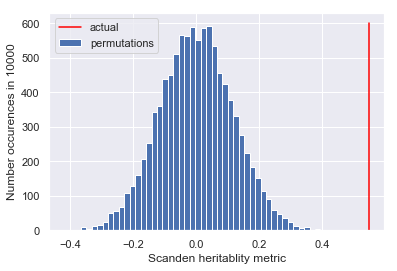

In [22]:
# Create histogram of the replicates
_ = plt.hist(permutations_replicates, bins = 50)

#create the actual value as a red line
_ = plt.plot([heritability_scandens, heritability_scandens], [0, 600], color = 'red')

#add labels and legend
_ = plt.xlabel('Scanden heritablity metric')
_ = plt.ylabel('Number occurences in 10000')
_ = plt.legend(['actual', 'permutations'])

#show the plot
plt.show()

## Final Takeaways

This was a great dataset to demonstrate statisitical concepts 

- We used performed exploratory data analysis:
    - Plotting ECDFs
    - Computing summary statistics

- We estimated parameters by optimization and linear regression
    - We thought probabilistily about those parameters and determined their confidence intervals using bootstrap methods. 
    
- Formulated and tested hypotheses

## Thanks for reading!
